<a href="https://colab.research.google.com/github/jonathanmendoza-tx/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Jonathan_Mendoza_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def mean_var_std(nums): # Population mean, variance and std dev from a list of numbers
  mean = sum(nums)/len(nums)
  vari = sum((i -mean)**2 for i in nums)/len(nums)
  std = vari**.5
  return mean, vari, std

sales = [3505,2400,3027,2798,3700,3250,2689]
sales_m, sales_v, sales_std = mean_var_std(sales)

print(f'Mean sales: {sales_m}\nSales variance: {sales_v}\nSales std dev: {sales_std}')

Mean sales: 3052.714285714286
Sales variance: 183761.06122448976
Sales std dev: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import numpy as np

customers = [127,80,105,92,120,115,93]

np.cov(sales, customers, ddof = 0)

array([[183761.06122449,   6518.02040816],
       [  6518.02040816,    249.3877551 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
cus_mean, cus_var, cus_std = mean_var_std(customers)
print(f'Mean customers: {cus_mean}\nCustomer Variance: {cus_var}\nCustomer std dev: {cus_std}')

sales_st = [(sales[i]-sales_m)/sales_std for i in range(len(sales))]
customers_st = [(customers[i]-cus_mean)/cus_std for i in range(len(customers))]

corr_coeff = np.cov(sales_st,customers_st, ddof = 0) 
print(corr_coeff)

print(np.corrcoef(sales, customers)) #checking work with numpy function

Mean customers: 104.57142857142857
Customer Variance: 249.3877551020408
Customer std dev: 15.792015549069118
[[1.         0.96283398]
 [0.96283398 1.        ]]
[[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.isna().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [0]:
df = df.drop(columns = ['cabin','body','boat','home.dest'])
df = df.fillna(method = 'ffill')
df.isna().sum()

Unnamed: 0          0
pclass              0
survived            0
name                0
sex                 0
age                 0
sibsp               0
parch               0
ticket              0
fare                0
embarked            0
has_cabin_number    0
dtype: int64

In [0]:
df.var()

Unnamed: 0          143117.500000
pclass                   0.701812
survived                 0.236181
age                    165.850021
sibsp                    1.084413
parch                    0.748735
fare                  2675.845648
has_cabin_number         0.174613
dtype: float64

In [0]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,143117.500000,284.492361,-54.116883,-1442.939812,25.559587,0.979374,-9420.069561,-95.438885
pclass,284.492361,0.701812,-0.127357,-3.951584,0.052781,0.013070,-24.218042,-0.249923
survived,-54.116883,-0.127357,0.236181,-0.314103,-0.013932,0.034861,6.151406,0.061424
age,-1442.939812,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.651280,1.463138
sibsp,25.559587,0.052781,-0.013932,-2.557851,1.084413,0.336722,8.647858,-0.003858
parch,0.979374,0.013070,0.034861,-1.458263,0.336722,0.748735,9.927754,0.013372
fare,-9420.069561,-24.218042,6.151406,113.651280,8.647858,9.927754,2675.845648,10.968906
has_cabin_number,-95.438885,-0.249923,0.061424,1.463138,-0.003858,0.013372,10.968906,0.174613


In [0]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,1,0.9,-0.29,-0.3,0.065,0.003,-0.48,-0.6
pclass,0.9,1,-0.31,-0.37,0.061,0.018,-0.56,-0.71
survived,-0.29,-0.31,1,-0.05,-0.028,0.083,0.24,0.3
age,-0.3,-0.37,-0.05,1,-0.19,-0.13,0.17,0.27
sibsp,0.065,0.061,-0.028,-0.19,1,0.37,0.16,-0.0089
parch,0.003,0.018,0.083,-0.13,0.37,1,0.22,0.037
fare,-0.48,-0.56,0.24,0.17,0.16,0.22,1,0.51
has_cabin_number,-0.6,-0.71,0.3,0.27,-0.0089,0.037,0.51,1


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

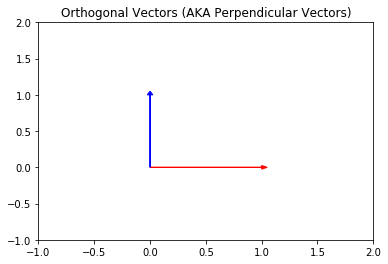

In [0]:
import matplotlib.pyplot as plt

v1 = [1,0]
v2 = [0,1]

plt.arrow(0,0, v1[0], v1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.title('Orthogonal Vectors (AKA Perpendicular Vectors)') # Orthogonal means perpendicular
plt.show()



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

Dot product between vector a and vector b: -40


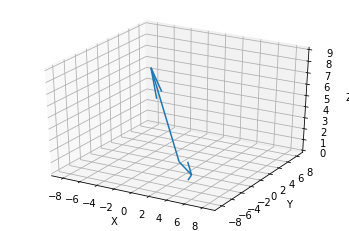

In [0]:
from mpl_toolkits.mplot3d import Axes3D

a = [-5,3,7]
b = [6,-8,2]

print(f'Dot product between vector a and vector b: {np.dot(a,b)}')


vectors = np.array([[0, 0, 0, -5, 3, 7], 
                    [0, 0, 0, 6, -8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-9, 9])
ax.set_ylim([-9, 9])
ax.set_zlim([0, 9])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


Vectors a & b are neither perpendicular nor parallel, the dot product is -40 and when graphed we can confirm they are not perpendicular (orthogonal)

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])
mag_c = sum(c**2)**.5
print(f'Magnitude of c squared: {mag_c**2}')

c_dot_c = np.dot(c,c)
print(f'c dotted with c:{c_dot_c}')

c_tran = c.T
c_tran_c = np.dot(c_tran, c)
print(f'c transpose dot c:{c_tran_c}')




Magnitude of c squared: 665.0
c dotted with c:665
c transpose dot c:665


They all equal the same value: 665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

###Linear combination format of vectors d and e:

\begin{equation} d =  7 \hat i + 12 \hat j \end{equation}
\begin{equation} e =  2 \hat i + 11 \hat j -8\hat k \end{equation}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4,12,11,9,2])
mag_f = sum(f**2)**.5
unit_vec_f = f/mag_f

print(unit_vec_f)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

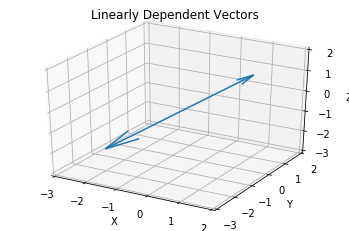

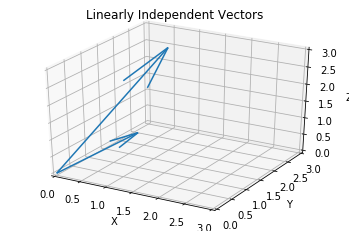

In [0]:
lind_vectors = np.array([[0, 0, 0, 1, 1, 1], 
                    [0, 0, 0, -2, -2, -2]])

X, Y, Z, U, V, W = zip(*lind_vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-3, 2])
ax.set_ylim([-3, 2])
ax.set_zlim([-3, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Linearly Dependent Vectors')
plt.show()

lini_vectors = np.array([[0, 0, 0, 1, 1, 1], 
                    [0, 0, 0, 1, 2, 3]])

X, Y, Z, U, V, W = zip(*lini_vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Linearly Independent Vectors')
plt.show()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1,2])
h = np.array([4,8])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

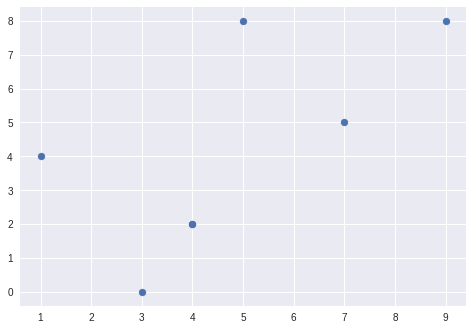

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()